# Generating Twitter Sentiment Score Data Frame

### Import packages and load file

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import datetime

pd.set_option('Display.max_columns', 100)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

### ★ Load Twitter sentiment data from pickle files

In [13]:
twitter = pd.concat([pd.read_pickle(r'../data_scrap/bert/'+x) for x in os.listdir('../data_scrap/bert/')])
twitter.reset_index(drop = True, inplace = True)

# Change datetime structure from y-m-d-h-s to y-m-d
twitter['Date'] = pd.to_datetime(twitter['Date']).dt.date

In [73]:
twitter = twitter.loc[twitter['Date'] <= pd.to_datetime('2022-08-31')]

c:\Users\user\anaconda3\envs\sentiment\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


### ★ Compare number of observations in each year from 2010 ~ 2021

In [74]:
# Deleting duplicated values for Content

twitter = twitter.loc[~twitter['Content'].duplicated()]
twitter.loc[twitter['Date'] < pd.to_datetime('2022-08-31')].shape

(1974238, 16)

In [ ]:
date = esad_update2['Date'].apply(lambda x: x.strftime("%Y-%m-%d"))

In [45]:
date.str.contains("2010").sum(), date.str.contains("2011").sum(), date.str.contains("2012").sum()

(3, 8, 21)

In [46]:
date.str.contains("2013").sum(), date.str.contains("2014").sum(), date.str.contains("2015").sum()

(33, 50, 30)

In [47]:
date.str.contains("2016").sum(), date.str.contains("2017").sum(), date.str.contains("2018").sum()

(58, 47, 121)

In [48]:
date.str.contains("2019").sum(), date.str.contains("2020").sum(), date.str.contains("2021").sum()

(118, 499, 566)

In [49]:
date.str.contains("2022").sum()

811

### ★ Check Politics

In [75]:
easd = twitter[['Date', 'Score', 'Content']]
easd['Content'] = easd['Content'].str.lower()

C:\Users\user\AppData\Local\Temp\ipykernel_17924\2483963932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  easd['Content'] = easd['Content'].str.lower()


In [76]:
easd.tail()

,Date,Score,Content
2069420,2022-08-27,-0.822627,$spy $qqq $qqq $iwm\nraising rates during a recession.. first time in history. clowns 🤡 show
2069421,2022-08-27,0.138095,5 most mentioned us stocks on reddit in past 24 hours:\n1. $bbby : 203\n2. $spy : 81\n3. $gme : 64\n4. $qqq : 62\n5. $ea : 20\n#stock #trading #usstock #stockmarket
2069422,2022-08-27,0.399261,$spy interesting that the bond market barely budged. \nthis was all about the equity market getting realigned.
2069423,2022-08-27,-0.940239,$spy jpow you son of a rat.
2069424,2022-08-27,-0.869257,$spy had it's worse open to close this whole year 😂


In [77]:
easd[easd['Date'] < pd.to_datetime('2018-12-31')].Score.mean()

c:\Users\user\anaconda3\envs\sentiment\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


0.0922879107137405

### ★ DELETE Politics

In [68]:
# easd.loc[easd['Content'].str.contains('trump'), ['Score']].mean()
easd_update = easd.loc[~(easd['Content'].str.contains('trump'))]
easd_update = easd_update.loc[~(easd['Content'].str.contains('obama'))]
easd_update = easd_update.loc[~(easd['Content'].str.contains('hillary'))]
easd_update = easd_update.loc[~(easd['Content'].str.contains('biden'))]
easd_update = easd_update.loc[~(easd['Content'].str.contains('elon'))]

easd_update = easd_update.loc[~(easd['Content'].str.contains('crypto'))]
easd_update = easd_update.loc[~(easd['Content'].str.contains('bitcoin'))]
easd_update = easd_update.loc[~(easd['Content'].str.contains('btc'))]
easd_update = easd_update.loc[~(easd['Content'].str.contains('etherium'))]
easd_update = easd_update.loc[~(easd['Content'].str.contains('doge'))]
easd_update = easd_update.loc[~(easd['Content'].str.contains('xrp'))]

easd_update = easd_update.loc[~(easd['Content'].str.contains('republican'))]
easd_update = easd_update.loc[~(easd['Content'].str.contains('democrat'))]
easd_update = easd_update.loc[~(easd['Content'].str.contains('election'))]

easd_update = easd_update.loc[~(easd['Content'].str.contains('russia'))]
easd_update = easd_update.loc[~(easd['Content'].str.contains('ukraine'))]

In [18]:
easd_update.shape

(1931095, 3)

### ☆ Politicians Check

In [78]:
trump = easd.loc[(easd['Content'].str.contains('trump'))]
date = trump['Date'].apply(lambda x: x.strftime("%Y-%m-%d"))

In [79]:
obama = easd.loc[(easd['Content'].str.contains('obama'))]
date = obama['Date'].apply(lambda x: x.strftime("%Y-%m-%d"))

In [80]:
biden = easd.loc[(easd['Content'].str.contains('biden'))]
date = biden['Date'].apply(lambda x: x.strftime("%Y-%m-%d"))

In [81]:
hillary = easd.loc[(easd['Content'].str.contains('hillary'))]
date = hillary['Date'].apply(lambda x: x.strftime("%Y-%m-%d"))

In [82]:
musk = easd.loc[(easd['Content'].str.contains('elon'))]
date = musk['Date'].apply(lambda x: x.strftime("%Y-%m-%d"))

In [20]:
date.str.contains("2010").sum(), date.str.contains("2011").sum(), date.str.contains("2012").sum()


(3, 8, 21)

In [21]:
date.str.contains("2013").sum(), date.str.contains("2014").sum(), date.str.contains("2015").sum()

(33, 50, 30)

In [22]:
date.str.contains("2016").sum(), date.str.contains("2017").sum(), date.str.contains("2018").sum()


(58, 47, 121)

In [23]:
date.str.contains("2019").sum(), date.str.contains("2020").sum(), date.str.contains("2021").sum(), date.str.contains("2022").sum()

(118, 499, 566, 811)

### ★ Final Dataframe

In [95]:
easd = easd.loc[~(easd['Content'].duplicated())]
easd_update = easd_update.loc[~(easd_update['Content'].duplicated())]

In [96]:
easd.shape, easd_update.shape

((1972034, 3), (1926720, 3))

In [97]:
# Delete obs with scores less or over than +- 0.2 & contains rt
# esad_update2 = easd_update.loc[((easd_update['Score'] < -0.3) | (easd_update['Score'] > 0.3)) & ~(easd_update['Content'].str.contains('@'))]
esad_update2 = easd_update.loc[((easd_update['Score'] < -0.3) | (easd_update['Score'] > 0.3)) & ((easd_update['Score'] < -0.95) | (easd_update['Score'] < 0.95)) & ~(easd_update['Content'].str.contains('@'))]

In [98]:
esad_update2.shape

(845246, 3)

### ★ check

In [ ]:
esad_update2.loc[esad_update2['Date'] == pd.to_datetime('2022-03-18')].head(10)

In [ ]:
esad_update2.loc[(esad_update2['Date'] > pd.to_datetime('2022-04-01')) & (esad_update2['Score'] > 0.95)].head(20)

In [100]:
esad_update2.loc[esad_update2['Content'].str.contains("democrat")].Score.mean()

nan

### ☆ End check

In [101]:
# Mean values of all Scores (no averaging daily)
easd.Score.mean()

0.07363830037161385

In [102]:
easd_2022 = easd.groupby('Date').mean()
easd_2022.mean()

Score    0.10158
dtype: float64

In [103]:
easd_update2 = esad_update2.groupby('Date').mean()
easd_update2.mean()

Score    0.098869
dtype: float64

In [104]:
easd_update2.tail()

,Score
Date,
2022-09-26,0.014424
2022-09-27,-0.000106
2022-09-28,0.082709
2022-09-29,-0.034796
2022-09-30,-0.003156


In [159]:
easd_2019to2022 = easd_update2.loc[easd_update2.index > pd.to_datetime("2018-12-31")]

c:\Users\user\anaconda3\envs\sentiment\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [109]:
import seaborn as sns

Text(0.5, 1.0, 'Daily Sentiment Score from 2019 to 2022')

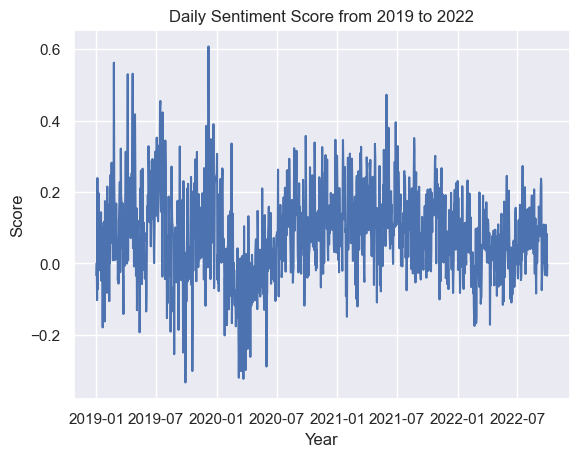

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')
plt.plot(easd_2019to2022)
plt.xlabel("Year")
plt.ylabel("Score")
plt.title("Daily Sentiment Score from 2019 to 2022")


In [164]:
df = easd_2019to2022['Score']
df.to_csv("./sent_score_0603.csv", index = True)

In [ ]:
df = easd_update2['Score']
df.to_csv("./sent_score_all.csv", index = True)

### ★ Until 2018 - Original Sample

In [110]:
# Mean value of scores without any screening until 2018
easd_2018 = easd.loc[easd['Date'] < pd.to_datetime('2018-12-31')]
easd_2018 = easd_2018.groupby('Date').mean()
easd_2018.mean()

c:\Users\user\anaconda3\envs\sentiment\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


Score    0.111996
dtype: float64

In [111]:
# Number of observations actually used until 2018?
easd_update2_2018 = esad_update2.loc[esad_update2['Date'] < pd.to_datetime('2018-12-31')]
easd_update2_2018.shape

c:\Users\user\anaconda3\envs\sentiment\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


(390885, 3)

In [112]:
# Mean value of scores with politician and rt screening until 2018
easd_update2_2018 = esad_update2.loc[esad_update2['Date'] < pd.to_datetime('2018-12-31')]
easd_update2_2018 = easd_update2_2018.groupby('Date').mean()
easd_update2_2018.mean()

Score    0.107698
dtype: float64

Text(0.5, 1.0, 'Daily Sentiment Score until 2018')

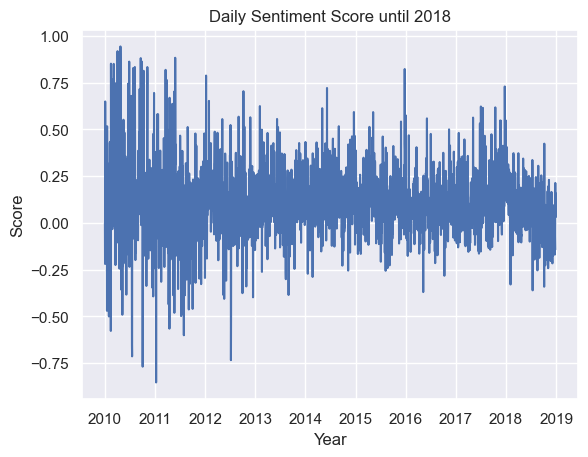

In [113]:
import matplotlib.pyplot as plt

sns.set(style='darkgrid')
plt.plot(easd_update2_2018)
plt.xlabel("Year")
plt.ylabel("Score")
plt.title("Daily Sentiment Score until 2018")

### ☆ Check for Anomalies

In [29]:
df.loc[df['Score'] > 0.5]

,Score
Date,
2010-02-14,0.628085
2010-03-06,0.648868
2010-03-14,0.580706
2010-04-24,0.948872
2010-06-19,0.596162
2010-08-07,0.833735
2010-11-06,0.865299
2016-06-04,0.518746
2018-04-01,0.654796


In [8]:
import datetime

twitter.loc[twitter['Date'] == datetime.date(2010,4,24), 'Content']

5716            fascinated to know how many of us have beat the $SPY over the last 2 months. All that hard work and the ETF beats us..aghh $$
5717    wow if this 3rd leg plays out which it sure looks like, the $SPY is going to 1380 on this recent rally. insane. check out the weekly.
Name: Content, dtype: object

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
# pd.set_option('display.float_format', lambda x: '%.5f' % x)
twitter.loc[twitter['Date'] == datetime.date(2014,12,20), ['Content','Score']]#.drop_duplicates()

In [42]:
example = twitter.loc[twitter['Date'] == datetime.date(2018,1,30), ['Content','Score']].drop_duplicates()
example['Content'] = example['Content'].str.lower()
example.loc[example['Content'].str.contains('trump'), ['Score']].mean()
# example

Score   -0.23134
dtype: float64

In [43]:
example['Score'].mean()

0.030882352491607888

In [ ]:
twitter.loc[twitter['Date'] == datetime.date(2014,12,20), 'Content']

In [182]:
twitter.loc[twitter['Date'] == datetime.date(2010,8,7), 'Content']

14145    E: On my way out to enjoy the beautiful NYC day. Just wanted to tweet that getting neutral on $SPY. Few trades make my heart skip a bit.    
14146    Dow rose 187.62 points,or 1.79% to 10653.56,Nasdaq gained 33.77 points,or 1.50% to 2288.47and S&P500 added 20.04 points,or 1.82% to 1121.64.
14147    The MSCI Asia Pacific Index rose 2.8 percent this week to a three-month high of 122.40, its longest streak of weekly gains since April 2009.
Name: Content, dtype: object

In [183]:
twitter.loc[twitter['Date'] == datetime.date(2010,11,6), 'Content']

21158    The best performing ETF for Nov. that we track is the iShares MSCI Hong Kong Index (Symbol: EWH) up 7.74%                                   
21159    ...Instead, I'm looking for the markets to soar to new highs, which traditionally happens this time of year anyway Trade with the trend $SPY
21160    August 2010: \nEnrolled in a trading course with S&P 500 trader Larry Levin. I think I've learned a lot - now start trading S&P500 eminis.  
21161    not gonna fail msci, hallelujah                                                                                                             
Name: Content, dtype: object

In [181]:
twitter.loc[twitter['Date'] == datetime.date(2016,4,1), 'Content']

662412    Switched from $DUST over to $NUGT quickly today ...but missed some other long opportunities.  Can't be a die hard short in this market. $SPY
662413    $SPY  Gap filled                                                                                                                            
662414    $SPY  #stockmarkets Slow clap for the bulls Yellen really knows how to prop up a market higher. More delay will mean more pain when it drops
662415    Tell you one thing .. on this April Fool's, the Joke was on shorts .. $ES_F $SPY $SPX                                                       
662416    Markets o/n, US: S&amp;P500 +0.63%, DJIA +0.61%, Nasdaq +0.92%. Europe: Stoxx -1.72%, DAX -1.71%, CAC -1.43%, FTSE -0.47%.                  
                                                                     ...                                                                              
663091    $SPY $QQQ $IWM $DIA $TLSA $SUNE learning a failed methodology.  Think outside the bo

In [195]:
twitter.loc[twitter['Date'] == datetime.date(2011,7,16), 'Content'] #9

47483    Another CEO falls in the News Corp phone hacking scandal. It's sad that it took a public outcry to scare the corporation straight. #dowjones
47484    FYI #Murdoch's norm way to hire non US citizens to work in US for #dowjones #Newscorp is by encouraging a lie on I visa  and employees I-9  
47485    WARNING TO SHORTS - Indicators suggest a significant equity rally is now likely - $ES_F $SPY $SPX $EURUSD $$ - [Jul. 15 at 11:16 PM]        
47486    Long Term Market Analysis: Equities Toppish, Gold and Silver Bull! $GDX $SPY $SLV: Drizzt: long term market analysis is a series once or…   
47487    U.S. Markets are closed. Dow30 +0.34% S&P500 +0.56% NASDAQ100 +0.98%                                                                        
47488    RT @mranti RT @dkberman: Breaking from WSJ: DowJones CEO Les Hinton is stepping down, latest resignation in hacking scandal.                
47489    RT @dkberman: Breaking from WSJ: DowJones CEO Les Hinton is stepping down, latest resignati

In [42]:
twitter.loc[twitter['Date'] == datetime.date(2012,7,7), 'Content'] # 20

138831         Not to mention fires in the West, power outages in the East, if you don't short retail you're a moron. IMHO. $SPY $TLT $GLD #yesitsSaturday
138832            I know it's Saturday but this #heatwave gonna put a damper on the economy when the A/C bills roll in IMHO. #longhotsummer $SPY $TLT $GLD
138833                                                                       MTS: New option trade on $BAC is posted. $SPY $XLF  #stocks #options #trading
138834                                                                                                  *spoiler alert--- this is all a dream $spy$iwm$vix
138835                   Top Stock searches on message boards and Twitter: $MIMV $AAPL $BCND $AA $SPY (01:30 pm) #stocks #finance #stockmarket #StockPicks
138836                                        Anyone else notice how FLAT those recently FALLING 50sma(s) are getting? Constructive $$ $SPY $IWM $QQQ $DIA
138837                  Not sure why ppl are obsessed with the S&amp;P

In [198]:
twitter.loc[twitter['Date'] == datetime.date(2018,2,3), 'Content'] 

869144    $SPX $SPY $DIA $QQQ Trend is ur friend but stoploss/hedge/exit plan is ur BEST FRIEND! Best friend will protect u from bad friends n serve you well in long run!                                                                                                                       
869145    ITCHIN for market open Sunday night... interesting week ahead $djia $spy $qqq $vix                                                                                                                                                                                                     
869146    My ongoing watchlist flourishes at the intersection of tradable liquidity and top 20% of 3-month volatility and a history of sweet swings. 4 stocks were green Friday... out of 58. $spy                                                                                               
869147    No one seems very worried about the selloff Friday in the $SPY and other indexes. Wouldn’t be surprised to see some foll

### ★ Export score variable for modeling

In [143]:
df_out = df.loc[:,'Score']
df_out.head()

Date
2010-01-01    0.057881
2010-01-02    0.234619
2010-01-03    0.499432
2010-01-04    0.394649
2010-01-05    0.059968
Name: Score, dtype: float64

In [144]:
df_out.to_csv("./sent_score_0516.csv", index = True)